<style>
/* Removed the pulse animation */
</style>

<div style="
  background-size: cover;
  padding: 10px;
  border-radius: 20px;
">
  <h1 style="
    color: #AED2FF;
    font-weight: bold;
    text-align: center;
  ">Bone Fracture Data</h1>
</div>


In [1]:
import cv2
import numpy as np
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import pipelines as pl

<style>
    .hero{
        background: linear-gradient(to right, #3F72AF, #BBE1FA);
        -webkit-background-clip: text;
        background-clip: text;
        color: transparent;
        font-size: 2.5em;
        font-weight: bold;
        margin-top:0 ; }
    .text-center{
        text-align: center;
    }
</style>
<h3 class="hero text-center">Preparing the data</h3>


In [2]:
foldername="data"
Dirs=["train","test","val"]
train_dir = os.path.join(foldername, Dirs[0])
classes=[d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
print(classes)

['fractured', 'not fractured']


<style>
    .hero{
        background: linear-gradient(to right, #3F72AF, #BBE1FA);
        -webkit-background-clip: text;
        background-clip: text;
        color: transparent;
        font-size: 2.5em;
        font-weight: bold;
        margin-top:0 ; }
    .text-center{
        text-align: center;
    }
</style>
<h3 class="hero text-center">Loading the images and labels</h3>
<p class="text-center"> A list for images and a corresponding one for labels</p>

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: bKGD: invalid
libpng warning: bKGD: invalid
libpng warning: bKGD: invalid
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file


Loaded 9243 training images


Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file


Loaded 506 test images


libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file


Loaded 829 validation images


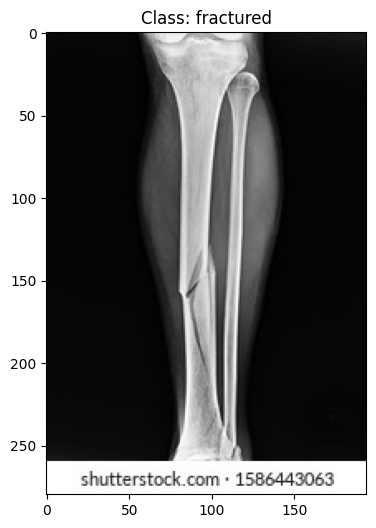

In [3]:
train_images = []
train_labels = []
test_images = []
test_labels = []
val_images = []
val_labels = []

def load_images_from_dir(directory, images_list, labels_list):
    for class_name in classes:
        class_path = os.path.join(directory, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images_list.append(img)
                labels_list.append(class_name)
    return len(images_list)

train_count = load_images_from_dir(os.path.join(foldername, Dirs[0]), train_images, train_labels)
print(f"Loaded {train_count} training images")

test_count = load_images_from_dir(os.path.join(foldername, Dirs[1]), test_images, test_labels)
print(f"Loaded {test_count} test images")

val_count = load_images_from_dir(os.path.join(foldername, Dirs[2]), val_images, val_labels)
print(f"Loaded {val_count} validation images")

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)
val_labels_encoded = label_encoder.transform(val_labels)

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(train_images[0], cv2.COLOR_GRAY2RGB))
plt.title(f"Class: {train_labels[0]}")
plt.show()


<style>
    .hero{
        background: linear-gradient(to right, #3F72AF, #BBE1FA);
        -webkit-background-clip: text;
        background-clip: text;
        color: transparent;
        font-size: 2.5em;
        font-weight: bold;
        margin-top:0 ; }
    .text-center{
        text-align: center;
    }
</style>
<h3 class="hero text-center">Use the pipline to preprocess the data</h3>

In [ ]:
pipeline=pl.preprocessingpipelinecreator(None,None)
train=pipeline.fit_transform(train_images)
test=pipeline.transform(test_images)
val=pipeline.transform(val_images)

<style>
    .hero{
        background: linear-gradient(to right, #3F72AF, #BBE1FA);
        -webkit-background-clip: text;
        background-clip: text;
        color: transparent;
        font-size: 2.5em;
        font-weight: bold;
        margin-top:0 ; }
    .text-center{
        text-align: center;
    }
</style>
<h3 class="hero text-center">Training Models</h3>

<style>
    .hero{
        background: linear-gradient(to right,rgb(118, 152, 194), #BBE1FA);
        -webkit-background-clip: text;
        background-clip: text;
        color: transparent;
        font-size: 2.5em;
        font-weight: bold;
        margin-top:0 ; }
    .text-center{
        text-align: center;
    }
</style>
<h2 class="hero text-center">Svc</h2>

In [5]:
svc=SVC(C=1000,random_state=420)
svc.fit(train,train_labels_encoded)

test_pred=svc.predict(test)
test_accuracy=svc.score(test,test_labels_encoded)
val_pred=svc.predict(val)
val_accuracy=svc.score(val,val_labels_encoded)
print(test_accuracy)
print(val_accuracy)

0.9644268774703557
0.9445114595898673


<style>
    .hero{
        background: linear-gradient(to right,rgb(118, 152, 194), #BBE1FA);
        -webkit-background-clip: text;
        background-clip: text;
        color: transparent;
        font-size: 2.5em;
        font-weight: bold;
        margin-top:0 ; }
    .text-center{
        text-align: center;
    }
</style>
<h2 class="hero text-center">feed forward neural network
</h2>

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models # type: ignore
import random

random_seed=5335
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

model = models.Sequential([
        layers.Input(shape=(100, 1)),  

        layers.Conv1D(64, kernel_size=5, padding='same', activation='relu'),
        layers.MaxPooling1D(pool_size=2),

        layers.Conv1D(32, kernel_size=5, padding='same', activation='relu'),
        layers.MaxPooling1D(pool_size=2),

        layers.Conv1D(32, kernel_size=5, padding='same', activation='relu'),
        layers.MaxPooling1D(pool_size=2),

        layers.Flatten(),
        layers.Dense(16, activation='relu'),
        layers.Dense(2, activation='softmax')  
    ])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

X_train = np.expand_dims(train, axis=2)
X_test = np.expand_dims(test, axis=2)
X_val = np.expand_dims(val, axis=2)

history = model.fit(
    X_train, 
    train_labels_encoded, 
    epochs=10,
    batch_size=32,
    validation_data=(X_test, test_labels_encoded),  
    verbose=1
)

test_loss, test_accuracy = model.evaluate(X_test, test_labels_encoded, verbose=1)
print(f'\nTest accuracy: {test_accuracy:.4f}')


val_loss, val_accuracy = model.evaluate(X_val, val_labels_encoded, verbose=1)
print(f'Validation accuracy: {val_accuracy:.4f}')

2025-05-13 15:12:48.439924: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-13 15:12:48.551290: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747138368.594781    5454 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747138368.607424    5454 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747138368.694735    5454 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Epoch 1/10


I0000 00:00:1747138371.717944    5804 service.cc:152] XLA service 0x7f0bfc004f00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747138371.717958    5804 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-05-13 15:12:51.744361: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747138371.896186    5804 cuda_dnn.cc:529] Loaded cuDNN version 91000


115/289 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6233 - loss: 0.6404

I0000 00:00:1747138374.108860    5804 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


289/289 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6804 - loss: 0.5806 - val_accuracy: 0.8103 - val_loss: 0.4095
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8391 - loss: 0.3530 - val_accuracy: 0.8419 - val_loss: 0.3391
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8935 - loss: 0.2652 - val_accuracy: 0.8755 - val_loss: 0.2937
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9151 - loss: 0.2117 - val_accuracy: 0.8972 - val_loss: 0.3084
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9343 - loss: 0.1820 - val_accuracy: 0.9032 - val_loss: 0.2737
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9330 - loss: 0.1655 - val_accuracy: 0.9209 - val_loss: 0.2974
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9547 - loss: 0.1249 - val_accuracy: 0.9229 - val_loss: 0.2241
Epoch 8/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9566 - loss: 0.1196 - val_accuracy: 0.9209 - val

<style>
    .hero{
        background: linear-gradient(to right,rgb(118, 152, 194), #BBE1FA);
        -webkit-background-clip: text;
        background-clip: text;
        color: transparent;
        font-size: 2.5em;
        font-weight: bold;
        margin-top:0 ; }
    .text-center{
        text-align: center;
    }
</style>
<h1 class="hero text-center">Cnn trial
</h1>


In [8]:

def preprocess_images(image_list, target_size=(128, 128)):
    result=np.zeros((len(image_list),128,128),dtype=np.float32)
    for i in range(len(image_list)):
        # Resize image
        if image_list[i] is not None:
            resized = np.float32(cv2.resize(image_list[i], target_size))/255
        else:
            resized= np.zeros((128,128),dtype=np.float32)
        result[i]=resized
    return result
print(len(train_labels_encoded))

train_labels=test_labels=val_labels=[]
print("pre")
train_data = preprocess_images(train_images) 
print("test")
test_data = preprocess_images(test_images)
print("val")
val_data = preprocess_images(val_images)

print("fine")
print(len(train_labels_encoded))

not_a_cnn = models.Sequential([
    # Input layer
    layers.Input(shape=(128, 128, 1)),
    
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),
    
    # Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')   #output
])


not_a_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = not_a_cnn.fit(
    train_data, 
    train_labels_encoded, 
    epochs=10,
    batch_size=32,
    validation_data=(test_data, test_labels_encoded),  
    verbose=1
)

test_loss, test_accuracy = not_a_cnn.evaluate(test_data, test_labels_encoded)
print(f'\nTest accuracy: {test_accuracy:.4f}')


val_loss, val_accuracy = not_a_cnn.evaluate(val_data, val_labels_encoded)

9243
pre
test
val
fine
9243
Epoch 1/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 32s 89ms/step - accuracy: 0.7610 - loss: 0.6167 - val_accuracy: 0.4704 - val_loss: 1.7685
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 22s 75ms/step - accuracy: 0.9288 - loss: 0.1838 - val_accuracy: 0.7925 - val_loss: 0.5996
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 23s 80ms/step - accuracy: 0.9659 - loss: 0.0988 - val_accuracy: 0.9387 - val_loss: 0.1615
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 23s 79ms/step - accuracy: 0.9794 - loss: 0.0709 - val_accuracy: 0.9348 - val_loss: 0.1997
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 23s 79ms/step - accuracy: 0.9888 - loss: 0.0326 - val_accuracy: 0.9664 - val_loss: 0.1560
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 25s 87ms/step - accuracy: 0.9883 - loss: 0.0365 - val_accuracy: 0.9585 - val_loss: 0.0741
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 25s 88ms/step - accuracy: 0.9878 - loss: 0.0366 - val_accuracy: 0.9506 - val_loss: 0.2069
Epoch 8/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 25s 85ms/step - accura